# House Price Prediction

# Life cycle of machine learning project

- understanding the problem satatement
- data collection
- Data checks to perform 
- EXploratory data analysis
- data pre-processing
- model training
- choose the best model

# Problem statement

Build a machine learning model  that can accurately predict the prices of houses based on various features such as the area of the house, the number of bedrooms and bathrooms, the number of stories, the presence of amenities like a main road, guest room, basement, hot water heating, air conditioning, parking, preferred area, and the furnishing status.

# Data collection

- Dataset source-https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

# Import Data and Required Packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import csv data as pandas dataframe
data= pd.read_csv('Housing.csv')

In [3]:
# show top 5 records
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# show bottom 5 records
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
# shape of the dataset
data.shape

(545, 13)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
# check missing value
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### There are no missing values in the data set

In [7]:
# check Duplicates
data.duplicated().sum()

0

#### There are no duplicates  values in the data set

In [8]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- Each column is listed along with its index, column name, non-null count, and data type.
- The dataset includes 6 columns of integer data type (`int64`) and 7 columns of object data type (`object`).
- Numeric columns such as `price`, `area`, `bedrooms`, `bathrooms`, `stories`, and `parking`, which are represented as integers (`int64`).
- Categorical columns such as `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, and `furnishingstatus`,  which are represented as objects (`object`).

In [9]:
### Checking the number of unique values of each column
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [10]:
# Check statistics of dataset
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Insight from the numerical data description:

1. Price:
   - The prices of houses in the dataset range from 1,750,000 to 13,300,000.
   - The average price is approximately 4,766,729, with a standard deviation of 1,870,440.
   - The majority of house prices fall between 3,430,000 (25th percentile) and 5,740,000 (75th percentile).

2. Area:
   - The areas of houses range from 1,650 to 16,200 square units.
   - The average area is approximately 5,150.54, with a standard deviation of 2,170.14.
   - The majority of houses have an area between 3,600 (25th percentile) and 6,360 (75th percentile).

3. Bedrooms:
   - The number of bedrooms in the houses ranges from 1 to 6.
   - The average number of bedrooms is approximately 2.97, with a standard deviation of 0.738.

4. Bathrooms:
   - The number of bathrooms in the houses ranges from 1 to 4.
   - The average number of bathrooms is approximately 1.29, with a standard deviation of 0.502.

5. Stories:
   - The number of stories in the houses ranges from 1 to 4.
   - The average number of stories is approximately 1.81, with a standard deviation of 0.867.

6. Parking:
   - The number of parking spaces available for the houses ranges from 0 to 3.
   - The average number of parking spaces is approximately 0.69, with a standard deviation of 0.861.



In [11]:
# compute the correlation matrix
corr_matrix=data.corr()
print(corr_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


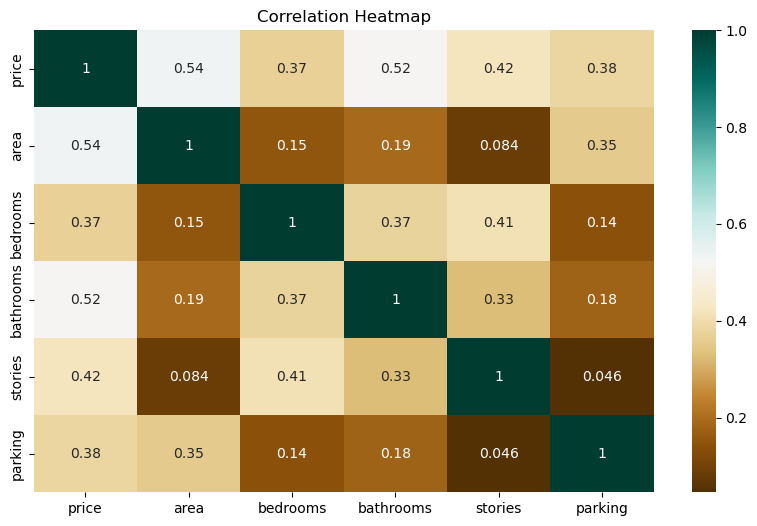

In [12]:
#plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot= True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()


- white=middle correlation
- green=positive correlation
- brown=negative correlation
- The correlation heatmap helps us understand the relationships between numerical variables.
- The 'Price' variable is positively correlated with 'Area' and 'Bathrooms', indicating that larger houses with more bathrooms tend to have higher prices.


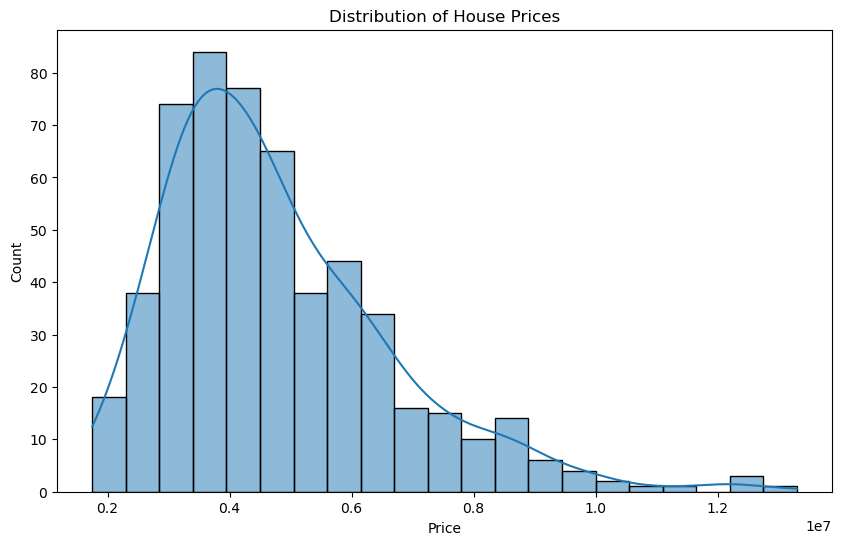

In [13]:

# Distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='price', kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()


In [14]:
# Calculate skewness

from scipy.stats import skew


price_skewness = skew(data['price'])

if price_skewness > 0:
    print("The distribution is right-skewed.")
elif price_skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is approximately symmetric.")


The distribution is right-skewed.


histogram of house prices is right-skewed, it indicates that the majority of the house prices are concentrated towards the lower end of the distribution, while a few houses have significantly higher prices.

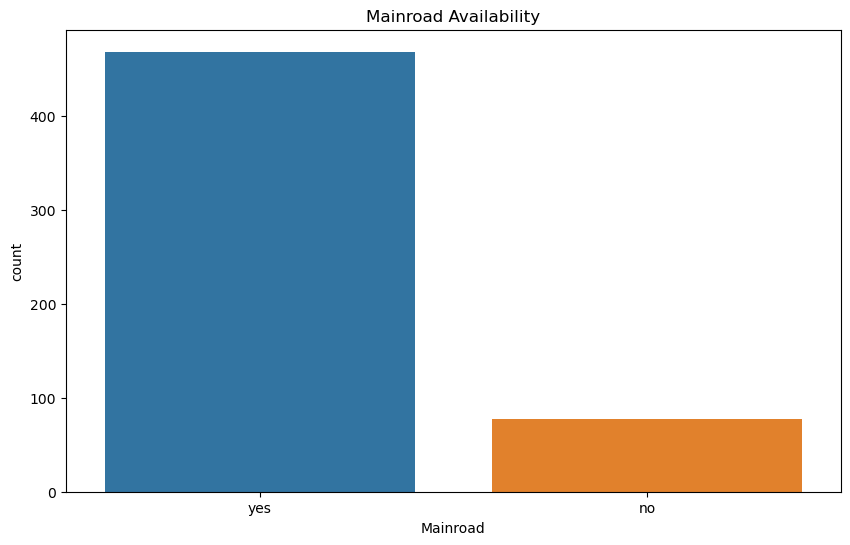

In [15]:
# countplot of the mainroad availability
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='mainroad')
plt.title('Mainroad Availability')
plt.xlabel('Mainroad')
plt.ylabel('count')
plt.show()

 The count plot shows that a majority of houses in the dataset have availability of the main road.

<AxesSubplot:xlabel='airconditioning', ylabel='bedrooms'>

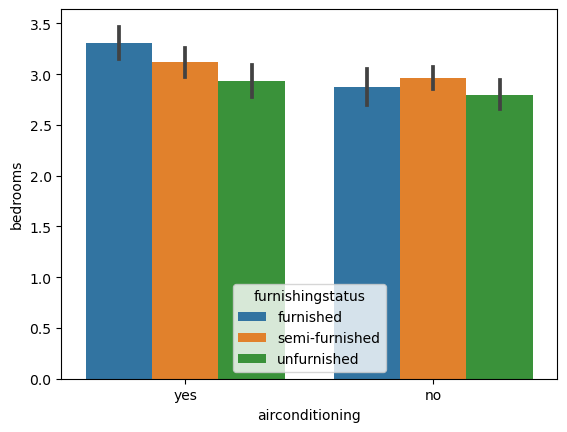

In [16]:
#Barplot showing the impact of Air Conditioning on the Average Number of Bedrooms based on Furnishing Status
sns.barplot(x=data['airconditioning'], y=data['bedrooms'],  hue=data['furnishingstatus'])

Insight: 
 - For houses with furnished status (indicated by a blue bar), those with air conditioning (x=yes) have the highest average number of bedrooms compared to houses without air conditioning (x=no).
 - In contrast, for houses with semi-furnished status (indicated by an orange bar), those with air conditioning tend to have a slightly higher average number of bedrooms compared to houses without air conditioning.
 - For houses with unfurnished status (indicated by a green bar), the average number of bedrooms is relatively consistent regardless of the presence or absence of air conditioning.



<AxesSubplot:xlabel='hotwaterheating', ylabel='bathrooms'>

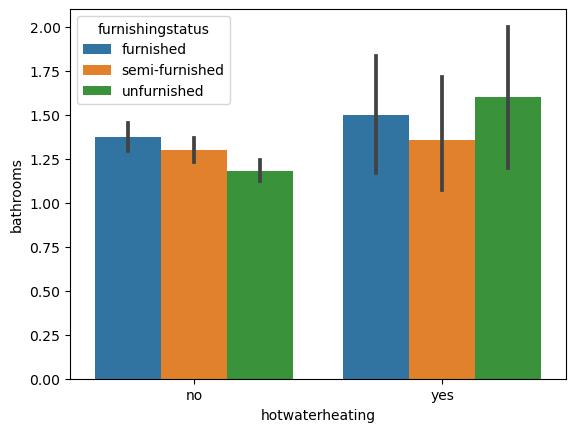

In [17]:
# Barplot showing the impact of Hot Water Heating on the Average Number of Bathrooms based on Furnishing Status
sns.barplot(x=data['hotwaterheating'], y=data['bathrooms'], hue=data['furnishingstatus'])

Insight: 
- For furnished houses, the presence of hot water heating is associated with a slightly higher average number of bathrooms compared to the absence of hot water heating.
- For semi-furnished houses, the presence of hot water heating is also associated with a slightly higher average number of bathrooms.
- For unfurnished houses, the presence of hot water heating is associated with a significantly higher average number of bathrooms.


# Box plot

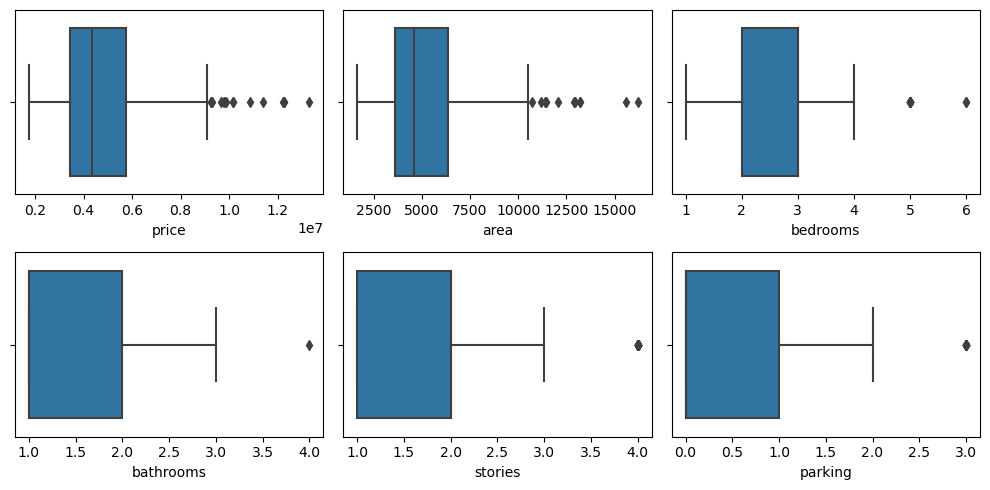

In [18]:
fig, axs = plt.subplots(2,3,figsize=(10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x23e64d54dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x23e64d54220>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e64d54940>],
 'medians': [<matplotlib.lines.Line2D at 0x23e62b707f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e62b70490>],
 'means': []}

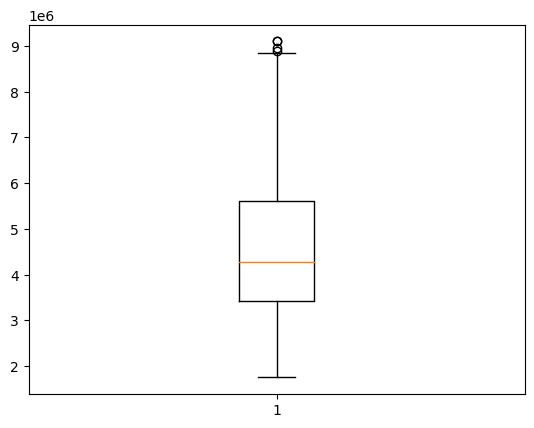

In [19]:
# Dealing with outliers in price 
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

plt.boxplot(data.price)


{'whiskers': [<matplotlib.lines.Line2D at 0x23e62be0550>,
 'caps': [<matplotlib.lines.Line2D at 0x23e62bb12e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e62be0dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x23e62bb1c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e62bb1790>],
 'means': []}

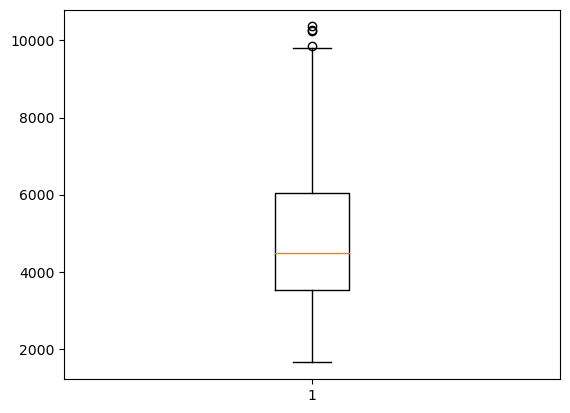

In [20]:
# Dealing with outliers in srea 

Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]
plt.boxplot(data.area)


# Feature Engineering

In [21]:
# Convert categorical variables into binary/dummy variables
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)



In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
15,9100000,6000,4,1,2,2,1,0,1,0,1,0,0,0
16,9100000,6600,4,2,2,1,0,1,1,1,1,0,1,1
17,8960000,8500,3,2,4,2,0,0,1,0,0,0,1,0
18,8890000,4600,3,2,2,2,0,0,1,1,0,0,1,0
19,8855000,6420,3,2,2,1,1,0,1,0,0,0,1,1


In [23]:
# Split the data into features (X) and target (y)
from sklearn.model_selection import train_test_split
X = data.drop(['price'],axis=1)
y = data['price']


In [24]:
# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
# Perform feature scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [27]:
# Models Training

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [29]:
pred ={}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name] = y_pred

# Models Evaluation

In [30]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    print("\n")

Results for Linear Regression : 
Mean Square Erroe : 855741101679.9824
R2 Score : 0.7101226832065204


Results for Lasso : 
Mean Square Erroe : 855741685449.5315
R2 Score : 0.7101224854579837


Results for Ridge : 
Mean Square Erroe : 856959662079.8167
R2 Score : 0.709709902964504


Results for K-Neighbors Regressor : 
Mean Square Erroe : 1591409000021.077
R2 Score : 0.4609194650794982


Results for Decision Tree : 
Mean Square Erroe : 1619081200934.6155
R2 Score : 0.4515456681041762


Results for Random Forest Regressor : 
Mean Square Erroe : 994408739787.2341
R2 Score : 0.6631498280033452


Results for XGBRegressor : 
Mean Square Erroe : 1015530307012.3225
R2 Score : 0.655995020057739


Results for CatBoosting Regressor : 
Mean Square Erroe : 914452313972.4469
R2 Score : 0.6902346018094478


Results for AdaBoost Regressor : 
Mean Square Erroe : 1076439008072.8538
R2 Score : 0.6353625521324041




In [31]:
# Get the best model based on the R2 score
best_model = max(acc, key=lambda x: acc[x])
best_r2_score = acc[best_model]

print(f"The best model is {best_model} with an R2 score of {best_r2_score}")

The best model is Linear Regression with an R2 score of 0.7101226832065204


In [32]:
# Train a linear regression model and calculate the accuracy
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 71.01


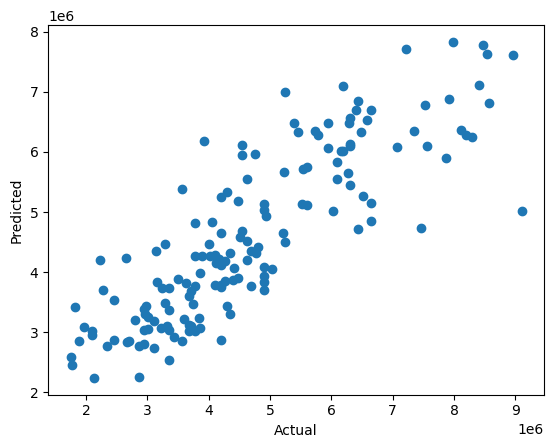

In [33]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

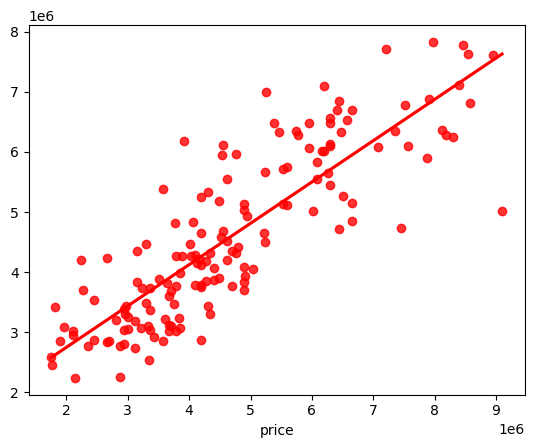

In [35]:
# Regression plot of actual vs predicted values
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()

In [36]:
# DataFrame with actual, predicted, and difference values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
331,3920000,6.181403e+06,-2.261403e+06
529,2275000,3.705548e+06,-1.430548e+06
469,3010000,3.256206e+06,-2.462056e+05
177,5243000,4.500573e+06,7.424268e+05
531,2233000,4.208703e+06,-1.975703e+06
...,...,...,...
219,4795000,4.418840e+06,3.761598e+05
86,6510000,5.258256e+06,1.251744e+06
313,4095000,4.280282e+06,-1.852821e+05
450,3150000,3.834320e+06,-6.843201e+05
